In [40]:
#importamos las librerias que pueden ser útiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Realizamos la importación de los datos desde el repositorio
!pip install ucimlrepo



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [115]:
# Imprimir las versiones de las bibliotecas
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'matplotlib version: {plt.matplotlib.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version: 2.2.2
numpy version: 1.26.4
matplotlib version: 3.9.1
seaborn version: 0.13.2


#### Importamos el dataset

In [5]:
#Importamos los datos a través del link del repositorio para que sea facil de ejecutar
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
individual_household_electric_power_consumption = fetch_ucirepo(id=235) 
  
# data (as pandas dataframes) 
df = individual_household_electric_power_consumption.data.features 

c:\Python311\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

### 1. Descripción del dataset

Según la información suministrada por el repositorio, la descripción de las columnas del dataset el la siguiente:

1. **date:** Fecha en formato dd/mm/yyyy
2. **time:** Hora en formato hh:mm:ss
3. **global_active_power:** Potencia activa global promediada por minuto en el hogar (en kilovatios)
4. **global_reactive_power:** Potencia reactiva global promediada por minuto en el hogar (en kilovatios)
5. **voltage:** Voltaje promediado por minuto (en voltios)
6. **global_intensity:** Intensidad de corriente global promediada por minuto en el hogar (en amperios)
7. **sub_metering_1:** Sub-medición de energía No. 1 (en vatios-hora de energía activa). Corresponde a la cocina, que principalmente contiene lavavajillas, horno y microondas (las placas calefactoras son de gas, no eléctricas).
8. **sub_metering_2:** Sub-medición de energía No. 2 (en vatios-hora de energía activa). Corresponde a la lavandería, que contiene una lavadora, una secadora, un refrigerador y una luz.
9. **sub_metering_3:** Sub-medición de energía No. 3 (en vatios-hora de energía activa). Corresponde a un calentador de agua eléctrico y un aire acondicionado.


In [23]:
#Los metadatos del dataset son los siguientes:
# metadata 
print(individual_household_electric_power_consumption.metadata) 
  
# variable information 
print(individual_household_electric_power_consumption.variables) 

print('La cantidad de registros en el dataset es de: ', len(df))

{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [27]:
#Contamos los valores faltantes
total_nulos = df.isna().sum()
porcentaje_nulos = df.isna().sum()*100/len(df)

#Imprimimos en pantalla
print('El total de datos nulos del dataset es de:\n', total_nulos)
print('\n')
print('En porcentaje (%):\n', porcentaje_nulos)

df[df.isnull().any(axis=1)]

El total de datos nulos del dataset es de:
 Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


En porcentaje (%):
 Date                     0.000000
Time                     0.000000
Global_active_power      0.000000
Global_reactive_power    0.000000
Voltage                  0.000000
Global_intensity         0.000000
Sub_metering_1           0.000000
Sub_metering_2           0.000000
Sub_metering_3           1.251844
dtype: float64


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


**Vemos que**  el dataset muestra una cantidad muy reducida de valores faltantes concentrados en la columna **Sub_metering_3**. Sin embargo, también podemos observar que las demas columnas contienen un signo de interrogación, aunque estas deberían corresponder con variables numéricas. 

In [59]:
#Para validar aquellas filas donde los valores deberían ser numéricos, las convertimos a número y validamos aquellas que no se pudieron convertir para ver los faltantes
columnas_numericas = ['Global_active_power',	'Global_reactive_power',	'Voltage',	'Global_intensity',	'Sub_metering_1',	'Sub_metering_2',	'Sub_metering_3']
df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')

#Adicionalmente, convertimos a fecha y hora las columnas de Date y Time

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [36]:
#Nuevamente validamos los valores nulos
#Contamos los valores faltantes
total_nulos = df.isna().sum()
porcentaje_nulos = df.isna().sum()*100/len(df)

#Imprimimos en pantalla
print('El total de datos nulos del dataset es de:\n', total_nulos)
print('\n')
print('En porcentaje (%):\n', porcentaje_nulos)

El total de datos nulos del dataset es de:
 Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


En porcentaje (%):
 Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
dtype: float64


Observamos que el porcentaje de valores no numéricos en el dataset se corresponde con aquellos que eran nulos en la columnas Sub_metering_3.

Ahora bien, validamos si se concentran en algun punto en el tiempo o si se encuentran distribuidos en todo el dataset

In [67]:
# Crear una máscara booleana para valores nulos
mask_nulls = df.isnull()


#Creamos una columnas con el mes y el año y ver cuantos nulos hay por 
df['Month_Year'] = df['Date'].dt.to_period('M')

null_counts = df.groupby(df['Month_Year'])[columnas_numericas].apply(lambda x: x.isnull().sum())
null_counts

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Month_Year,,,,,,,
2006-12,4,4,4,4,4,4,4
2007-01,2,2,2,2,2,2,2
2007-02,2,2,2,2,2,2,2
2007-03,1,1,1,1,1,1,1
2007-04,3723,3723,3723,3723,3723,3723,3723
2007-05,0,0,0,0,0,0,0
2007-06,43,43,43,43,43,43,43
2007-07,131,131,131,131,131,131,131
2007-08,22,22,22,22,22,22,22


Como podemos validar la cantidad de datos nulos en el dataset se encuentra distribuida en el tiempo y corresponde a un porcentaje muy pequeño de la cantidad total de información en el dataset

### Distribución de las variables

In [73]:
#Hacemos un describe para ver información básica de los datos
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00
mean,2008-12-05 19:13:27.255191040,1.09,0.12,240.84,4.63,1.12,1.30,6.46
min,2006-12-16 00:00:00,0.08,0.00,223.20,0.20,0.00,0.00,0.00
25%,2007-12-12 00:00:00,0.31,0.05,238.99,1.40,0.00,0.00,0.00
50%,2008-12-06 00:00:00,0.60,0.10,241.01,2.60,0.00,0.00,1.00
75%,2009-12-01 00:00:00,1.53,0.19,242.89,6.40,0.00,1.00,17.00
max,2010-11-26 00:00:00,11.12,1.39,254.15,48.40,88.00,80.00,31.00
std,NaN,1.06,0.11,3.24,4.44,6.15,5.82,8.44


In [71]:
#Vemos como se distribuyen los datos en el tiempo
# Agrupar por mes y año y contar los valores
counts_per_month_year = df.groupby(df['Date'].dt.to_period('M')).size()

print(counts_per_month_year)

Date
2006-12    21996
2007-01    44640
2007-02    40320
2007-03    44640
2007-04    43200
2007-05    44640
2007-06    43200
2007-07    44640
2007-08    44640
2007-09    43200
2007-10    44640
2007-11    43200
2007-12    44640
2008-01    44640
2008-02    41760
2008-03    44640
2008-04    43200
2008-05    44640
2008-06    43200
2008-07    44640
2008-08    44640
2008-09    43200
2008-10    44640
2008-11    43200
2008-12    44640
2009-01    44640
2009-02    40320
2009-03    44640
2009-04    43200
2009-05    44640
2009-06    43200
2009-07    44640
2009-08    44640
2009-09    43200
2009-10    44640
2009-11    43200
2009-12    44640
2010-01    44640
2010-02    40320
2010-03    44640
2010-04    43200
2010-05    44640
2010-06    43200
2010-07    44640
2010-08    44640
2010-09    43200
2010-10    44640
2010-11    37263
Freq: M, dtype: int64


Aquí podemos validar que la cantidad de información que tenemos en el dataset por mes se encuentra distribuida de manera muy uniforme a lo largo de los meses

In [81]:
def plot_time_series(df, columns):
    # Convertir la columna 'Date' a formato datetime si no está en ese formato
    if not pd.api.types.is_datetime64_any_dtype(df['Date']):
        df['Date'] = pd.to_datetime(df['Date'])
    
    # Configurar el tamaño de la figura
    plt.figure(figsize=(12, 6))

    # Graficar cada columna específica en función de la fecha
    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            plt.plot(df['Date'], df[col], label=col)

    # Añadir etiquetas y título
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Distribution Over Time')
    plt.legend()

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

C:\Users\cdsdu\AppData\Local\Temp\ipykernel_6164\2210279458.py:21: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\cdsdu\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


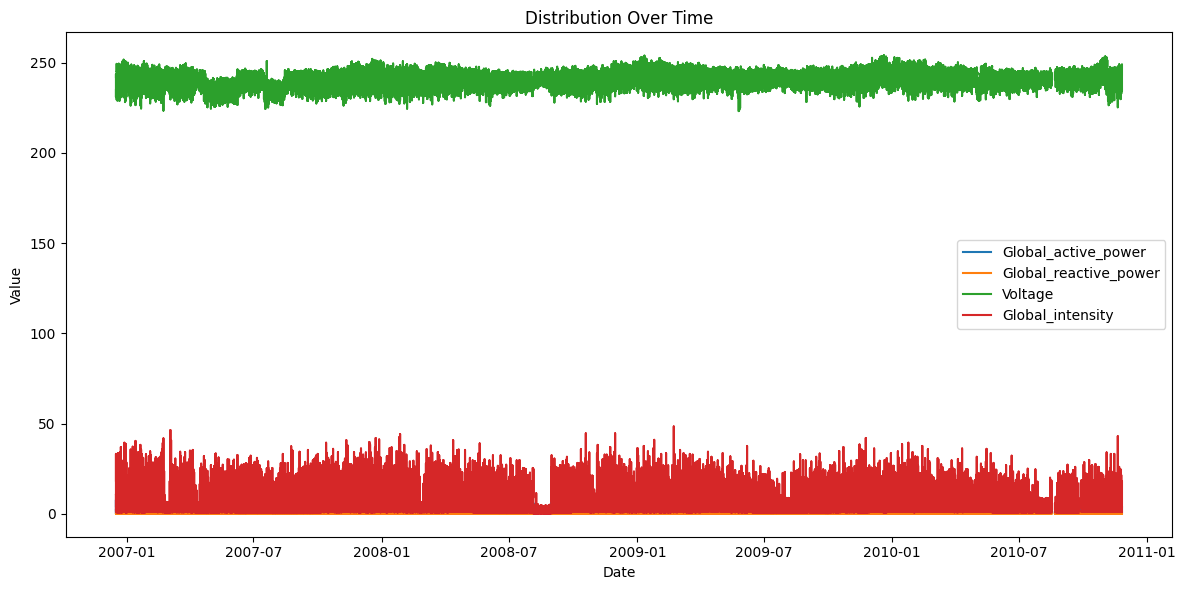

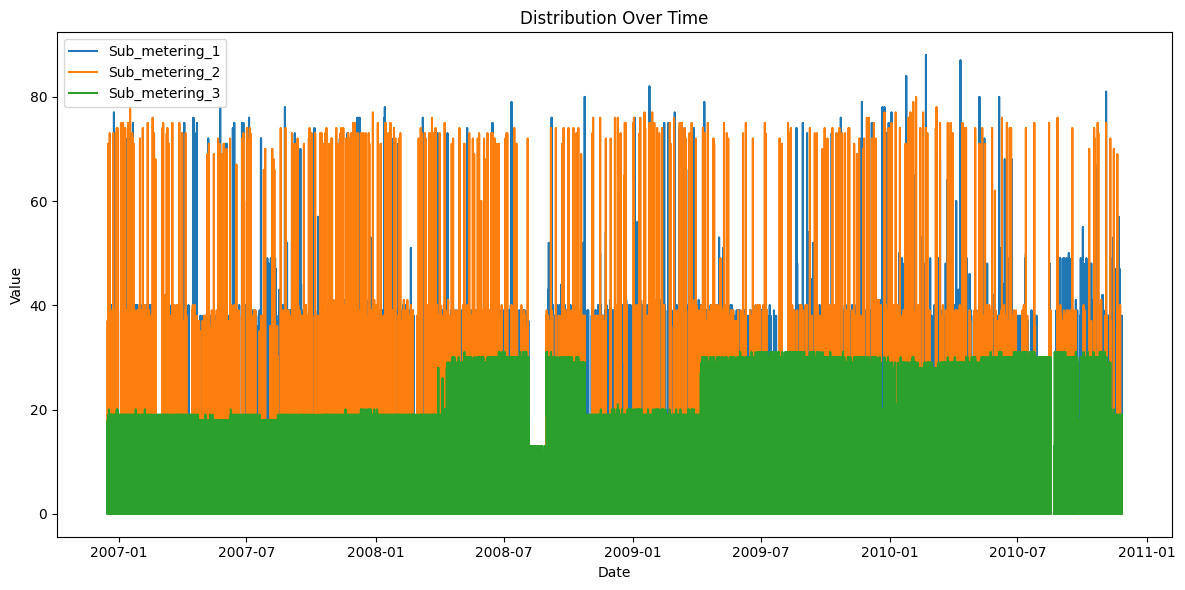

In [82]:
columns_to_plot = ['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity']  # Definir las columnas a graficar
plot_time_series(df, columns_to_plot)


columns_to_plot = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']  # Definir las columnas a graficar
plot_time_series(df, columns_to_plot)

In [98]:
#Agrupamos la información por mes para ver su distribución
grouped_data = df[columnas_numericas].groupby(df['Date'].dt.to_period('M')).sum()
grouped_data.reset_index(inplace=True)
grouped_data['Date'] = grouped_data['Date'].astype(str)
grouped_data['Date'] = pd.to_datetime(grouped_data['Date'], format='%Y-%m')

#

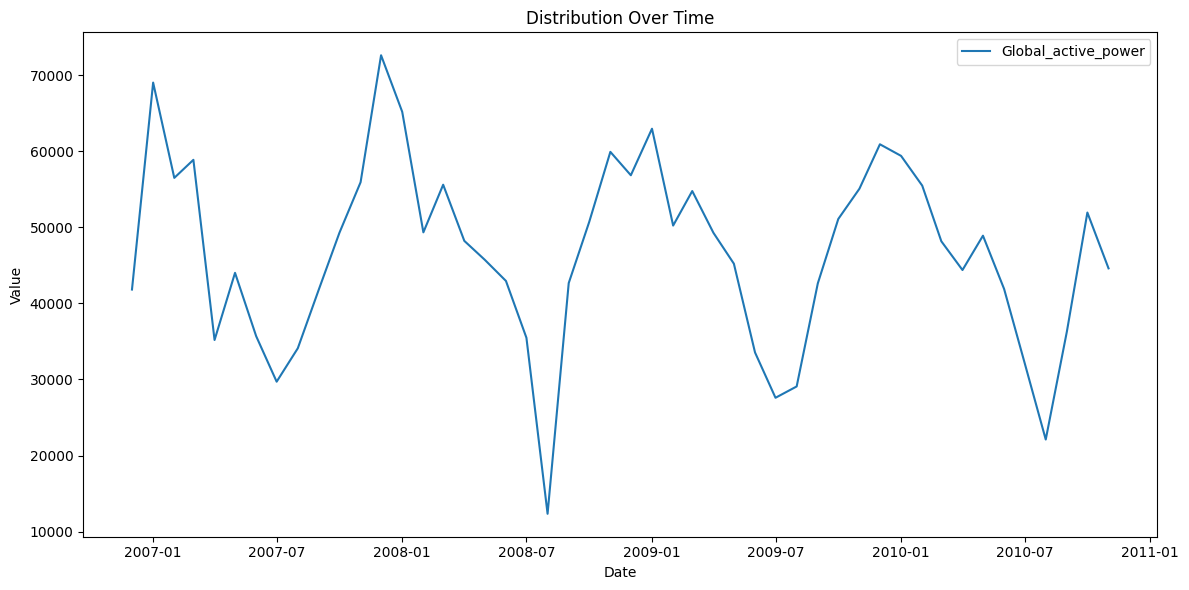

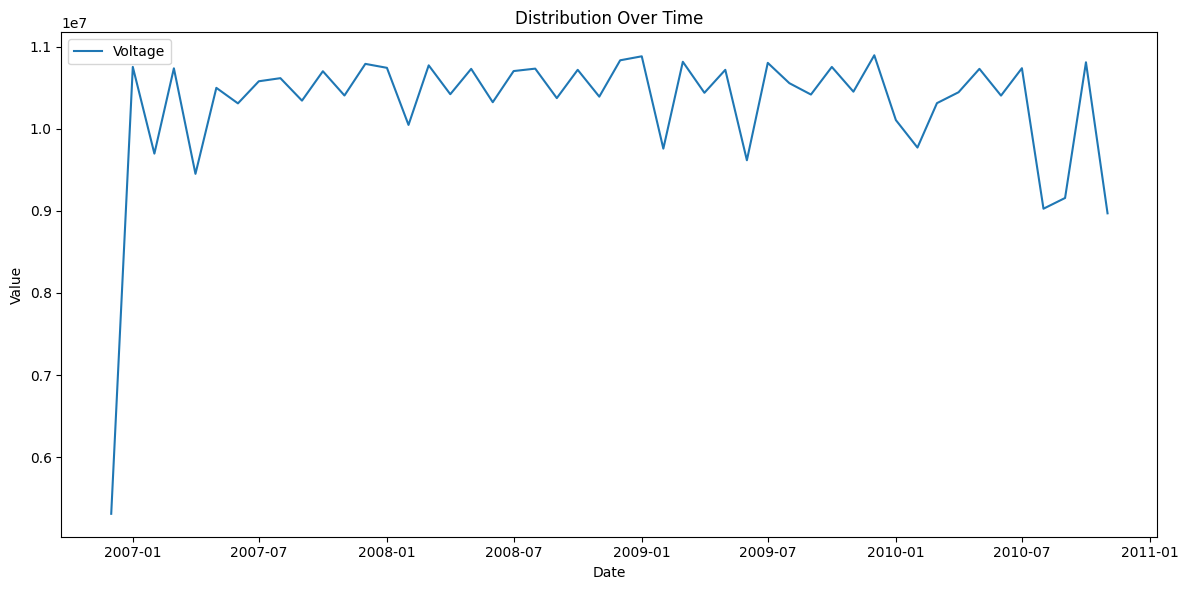

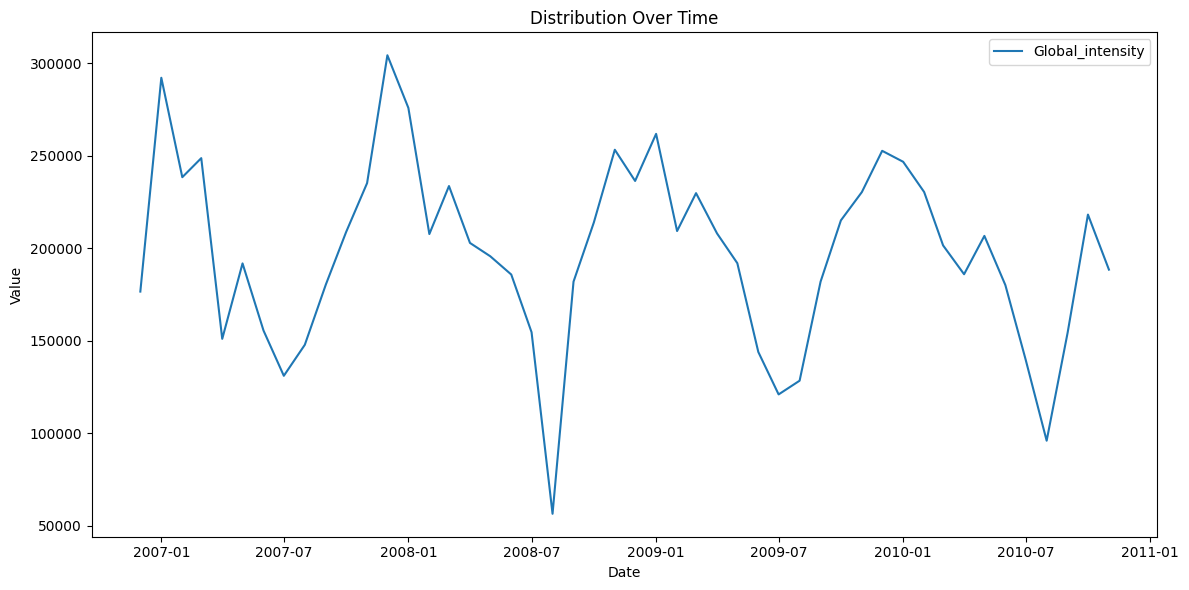

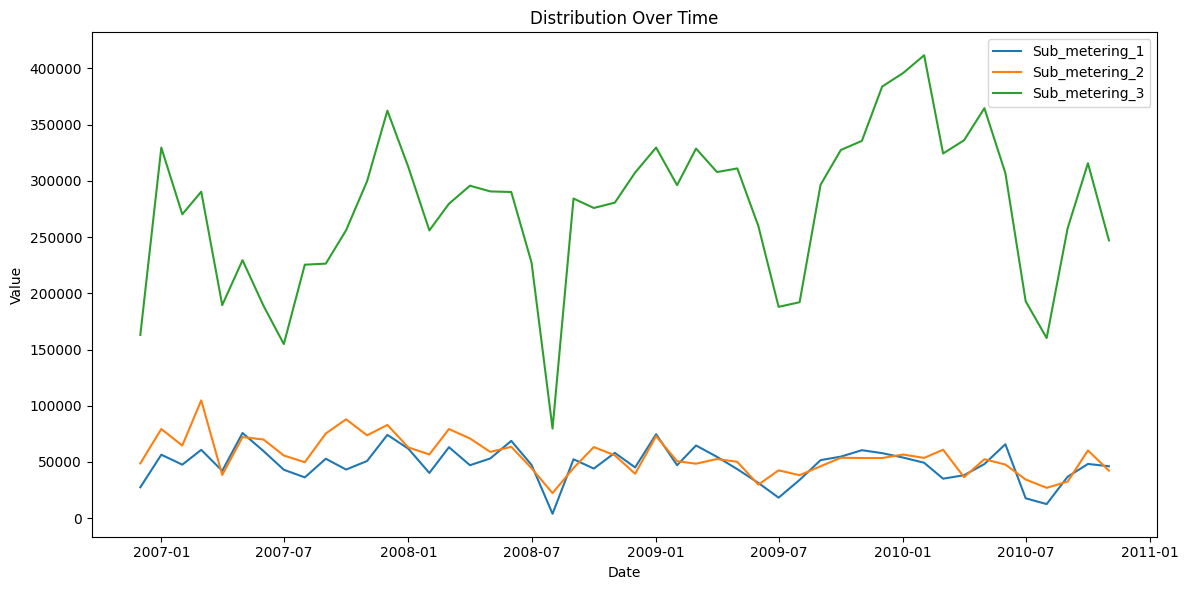

In [106]:
#Se grafica su comportamiento mensual

#Se grafica su comportamiento mensual
columns_to_plot = ['Global_active_power']  # Definir las columnas a graficar
plot_time_series(grouped_data, columns_to_plot)


columns_to_plot = ['Voltage']  # Definir las columnas a graficar
plot_time_series(grouped_data, columns_to_plot)

columns_to_plot = ['Global_intensity']  # Definir las columnas a graficar
plot_time_series(grouped_data, columns_to_plot)


columns_to_plot = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']  # Definir las columnas a graficar
plot_time_series(grouped_data, columns_to_plot)

Podemos observar que casi todas las variables tienen un comportamiento periódico que podría estár correlacionado, para ellos observamos el grado de correlación entre las variables:

1. Observamos la correlación sin tener en cuenta la agrupación

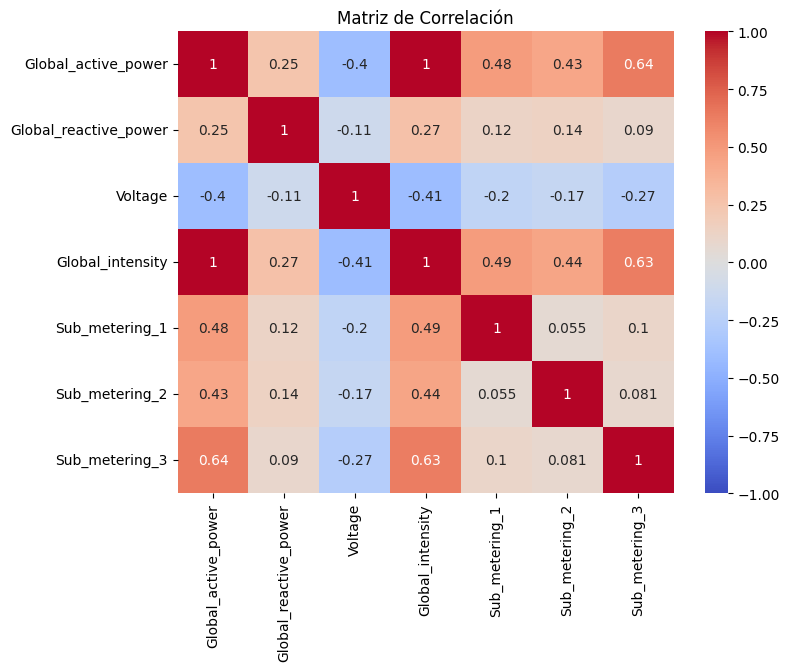

In [110]:
corr_matrix = df[columnas_numericas].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

2. Observamos el gráfico teniendo en cuenta la agrupación mensual

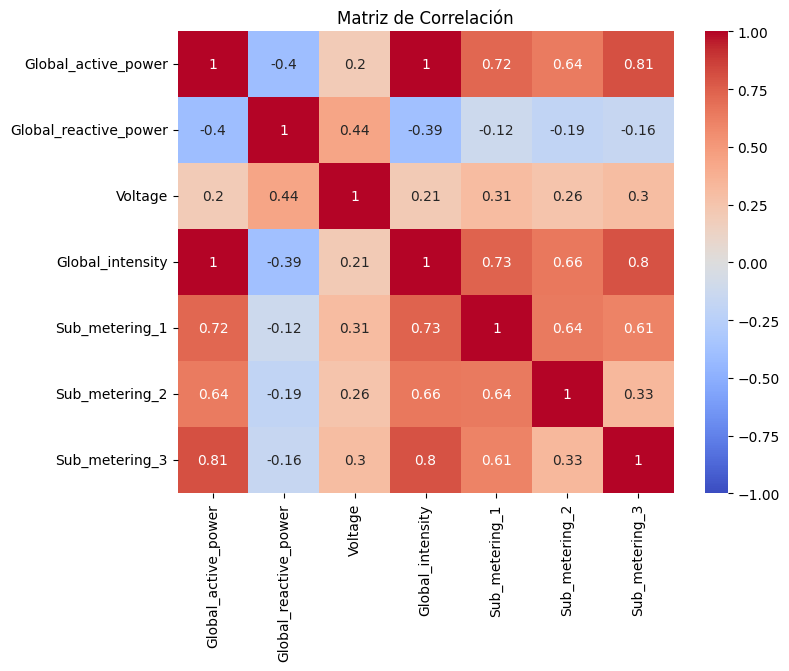

In [111]:
corr_matrix = grouped_data[columnas_numericas].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

Aquí podemos observar que al hacer la agrupación el grado de correlación entre las variables es significativo, lo que podrías ser muy importante al momento de realizar algún tipo de modelación

### Por último observamos como se distributen los valores de las variables

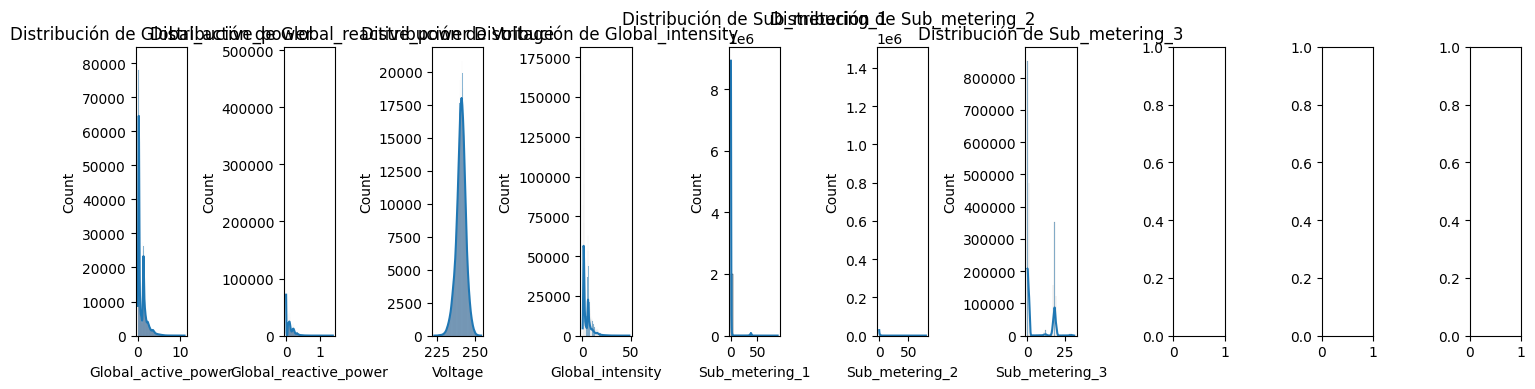

In [114]:
# Crear subplots para cada variable numérica
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 4))

# Graficar histogramas para cada variable
for ax, column in zip(axes, df[columnas_numericas]):
    sns.histplot(df[column], ax=ax, kde=True)
    ax.set_title(f'Distribución de {column}')

plt.tight_layout()
plt.show()